### Figures for the 1d tensor cross-interpolation simulations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tools import merge_pkl, read_field, create_subplots, fit_power_law, fit_exponential, custom_errorbar

# Force imported libraries and modules to auto-reload
%load_ext autoreload
%autoreload 2

DATA_PATH = "data/"
SHOW_FIGURES = True

In [2]:
# Test
import seemps.tools

seemps.tools.DEBUG = 4
from data_cross_1d import data_cross_1d

σ, μ = 1 / 3, 0
ε = 1 / 100
x_c = (1 / 2) + (1 / 2**5)
func_g = lambda x: (1 / (σ * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - μ) / σ) ** 2)
func_o = lambda x: np.cos(1 / (x**2 + ε))
func_a = lambda x: np.abs(x - x_c)
func_s = lambda x: np.heaviside(x - x_c, 1 / 2)

if False:
    data_cross_1d(func_o, 25, 12, 1e-14)

In [3]:
# Set parameter ranges
range_n = range(2, 25 + 1)
range_r = range(2, 30 + 1, 2)
range_t = [10 ** -(exp) for exp in range(1, 14 + 1)]

# Set fixed parameters
fixed_n = 25
fixed_r = 50
fixed_t = 1e-14

# Set fixed threshold bond dimension for each function
fixed_r_g = 12
fixed_r_o = 24
fixed_r_a = 6
fixed_r_s = 6

# Load up results for the other functions with respect to n
params_n = {"n": range_n, "r": fixed_r_g, "t": fixed_t}
data_n_g = merge_pkl(params_n, name="cross_1d_gaussian", path=DATA_PATH)
params_n["r"] = fixed_r_o
data_n_o = merge_pkl(params_n, name="cross_1d_osc", path=DATA_PATH)
params_n["r"] = fixed_r_a
data_n_a = merge_pkl(params_n, name="cross_1d_abs", path=DATA_PATH)
params_n["r"] = fixed_r_s
data_n_s = merge_pkl(params_n, name="cross_1d_step", path=DATA_PATH)

# Load up results for the other functions with respect to r
params_r = {"n": fixed_n, "r": range_r, "t": fixed_t}
data_r_g = merge_pkl(params_r, name="cross_1d_gaussian", path=DATA_PATH)
data_r_o = merge_pkl(params_r, name="cross_1d_osc", path=DATA_PATH)
data_r_a = merge_pkl(params_r, name="cross_1d_abs", path=DATA_PATH)
data_r_s = merge_pkl(params_r, name="cross_1d_step", path=DATA_PATH)

# Load up results for the other functions with respect to t
params_t = {"n": fixed_n, "r": fixed_r_g, "t": range_t}
data_t_g = merge_pkl(params_t, name="cross_1d_gaussian", path=DATA_PATH)
params_t["r"] = fixed_r_o
data_t_o = merge_pkl(params_t, name="cross_1d_osc", path=DATA_PATH)
params_t["r"] = fixed_r_a
data_t_a = merge_pkl(params_t, name="cross_1d_abs", path=DATA_PATH)
params_t["r"] = fixed_r_s
data_t_s = merge_pkl(params_t, name="cross_1d_step", path=DATA_PATH)

In [4]:
# fmt: off
from tools import set_plot_parameters, STYLE_FIT_1, STYLE_FIT_2
set_plot_parameters()

# Styles
STYLE_G = {"linestyle": "solid", "marker": None, "color": "tab:blue"}
STYLE_O = {"linestyle": (0, (5, 1)), "marker": None, "color": "tab:red"}
STYLE_A = {"linestyle": "dashdot", "marker": None, "color": "tab:orange"}
STYLE_S = {"linestyle": (0, (3, 1, 1, 1, 1, 1)), "marker": None, "color": "tab:green"}
STYLE_G_SVD = {"linestyle": (0, (1, 1)), "marker": None, "color": "tab:blue", "linewidth": 2.5}
STYLE_O_SVD = {"linestyle": (0, (1, 1)), "marker": None, "color": "tab:red", "linewidth": 2.5}
STYLE_A_SVD = {"linestyle": (0, (1, 1)), "marker": None, "color": "tab:orange", "linewidth": 2.5}
STYLE_S_SVD = {"linestyle": (0, (1, 1)), "marker": None, "color": "tab:green", "linewidth": 2.5}

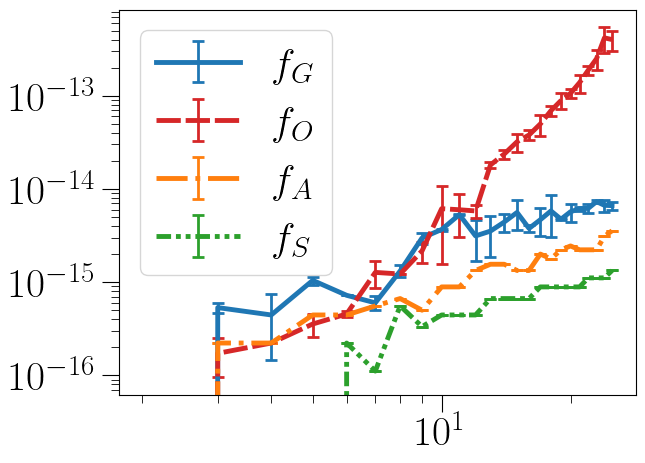

In [5]:
# fmt: off
def plot_norms_n(ax):
    custom_errorbar(ax, range_n, read_field(data_n_g, "mean_error"), read_field(data_n_g, "std_error"), **STYLE_G, label=r"$f_G$")
    custom_errorbar(ax, range_n, read_field(data_n_o, "mean_error"), read_field(data_n_o, "std_error"), **STYLE_O, label=r"$f_O$")
    custom_errorbar(ax, range_n, read_field(data_n_a, "mean_error"), read_field(data_n_a, "std_error"), **STYLE_A, label=r"$f_A$")
    custom_errorbar(ax, range_n, read_field(data_n_s, "mean_error"), read_field(data_n_s, "std_error"), **STYLE_S, label=r"$f_S$")
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend()



if SHOW_FIGURES:
	fig, ax = create_subplots()
	plot_norms_n(ax)

<>:9: SyntaxWarning: invalid escape sequence '\c'
<>:9: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_260688/3947589640.py:9: SyntaxWarning: invalid escape sequence '\c'
  fit_exponential(ax, range_r, read_field(data_r_g, "mean_error"), fit_range=slice(1, 5), label="\chi_{\mathrm{thr}}", style=STYLE_FIT_1)


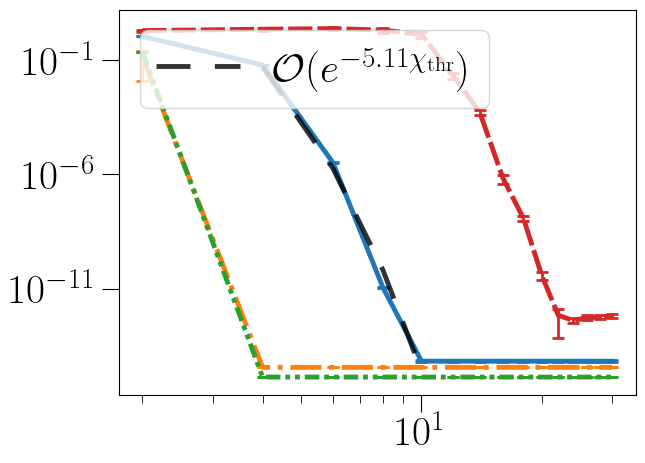

In [6]:
# fmt: off
def plot_norms_r(ax):
    custom_errorbar(ax, range_r, read_field(data_r_g, "mean_error"), read_field(data_r_g, "std_error"), **STYLE_G)
    custom_errorbar(ax, range_r, read_field(data_r_o, "mean_error"), read_field(data_r_o, "std_error"), **STYLE_O)
    custom_errorbar(ax, range_r, read_field(data_r_a, "mean_error"), read_field(data_r_a, "std_error"), **STYLE_A)
    custom_errorbar(ax, range_r, read_field(data_r_s, "mean_error"), read_field(data_r_s, "std_error"), **STYLE_S)
    ax.set_xscale('log')
    ax.set_yscale('log')
    fit_exponential(ax, range_r, read_field(data_r_g, "mean_error"), fit_range=slice(1, 5), label="\chi_{\mathrm{thr}}", style=STYLE_FIT_1)
    ax.legend(loc='upper left')


if SHOW_FIGURES:
    fig, ax = create_subplots()
    plot_norms_r(ax)

<>:7: SyntaxWarning: invalid escape sequence '\e'
<>:7: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_260688/4057691939.py:7: SyntaxWarning: invalid escape sequence '\e'
  fit_power_law(ax, range_t, read_field(data_t_g, "error_simp"), label="\epsilon", style=STYLE_FIT_1)


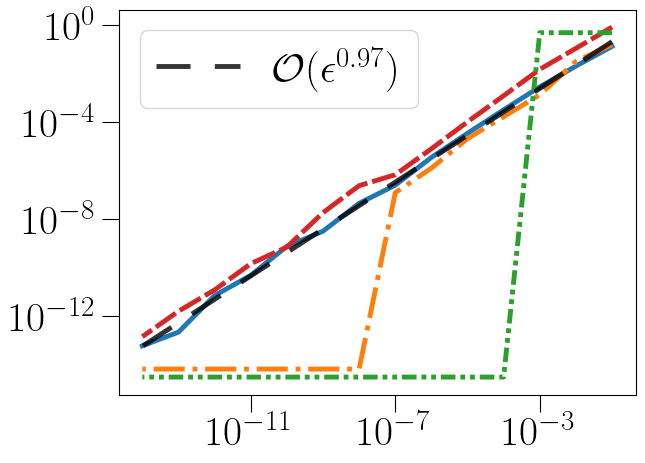

In [7]:
# fmt: off
def plot_norms_t(ax):
    ax.loglog(range_t, read_field(data_t_g, "error_simp"), **STYLE_G)
    ax.loglog(range_t, read_field(data_t_o, "error_simp"), **STYLE_O)
    ax.loglog(range_t, read_field(data_t_a, "error_simp"), **STYLE_A)
    ax.loglog(range_t, read_field(data_t_s, "error_simp"), **STYLE_S)
    fit_power_law(ax, range_t, read_field(data_t_g, "error_simp"), label="\epsilon", style=STYLE_FIT_1)
    ax.legend()
    

if SHOW_FIGURES:
    fig, ax = create_subplots()
    plot_norms_t(ax)

Plots of the maximum bond dimension $\chi_{max}$.

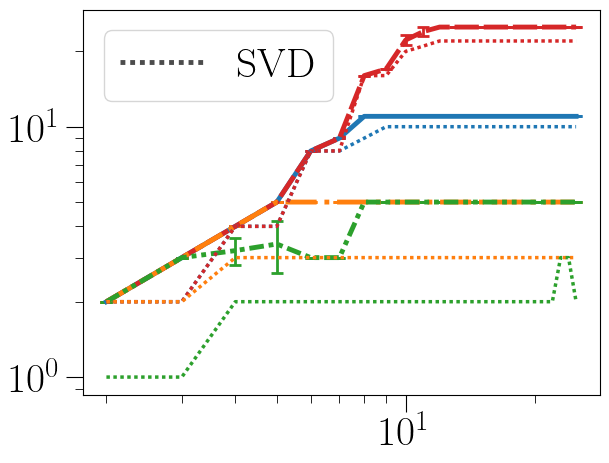

In [8]:
# fmt: off
def plot_bonds_n(ax):
    custom_errorbar(ax, range_n, read_field(data_n_g, "mean_maxbond"), read_field(data_n_g, "std_maxbond"), **STYLE_G, zorder=2)
    custom_errorbar(ax, range_n, read_field(data_n_o, "mean_maxbond"), read_field(data_n_o, "std_maxbond"), **STYLE_O, zorder=2)
    custom_errorbar(ax, range_n, read_field(data_n_a, "mean_maxbond"), read_field(data_n_a, "std_maxbond"), **STYLE_A, zorder=2)
    custom_errorbar(ax, range_n, read_field(data_n_s, "mean_maxbond"), read_field(data_n_s, "std_maxbond"), **STYLE_S, zorder=2)
    ax.plot(range_n, read_field(data_n_g, "maxbond_svd"), **STYLE_G_SVD, zorder=3)
    ax.plot(range_n, read_field(data_n_o, "maxbond_svd"), **STYLE_O_SVD, zorder=3)
    ax.plot(range_n, read_field(data_n_a, "maxbond_svd"), **STYLE_A_SVD, zorder=3)
    ax.plot(range_n, read_field(data_n_s, "maxbond_svd"), **STYLE_S_SVD, zorder=3)
    ax.set_xscale('log')
    ax.set_yscale('log')
    svd_line = plt.Line2D([], [], color="k", linestyle=(0, (1, 1)), alpha=0.7)
    ax.legend([svd_line], ["SVD"])

if SHOW_FIGURES:
	fig, ax = create_subplots()
	plot_bonds_n(ax)

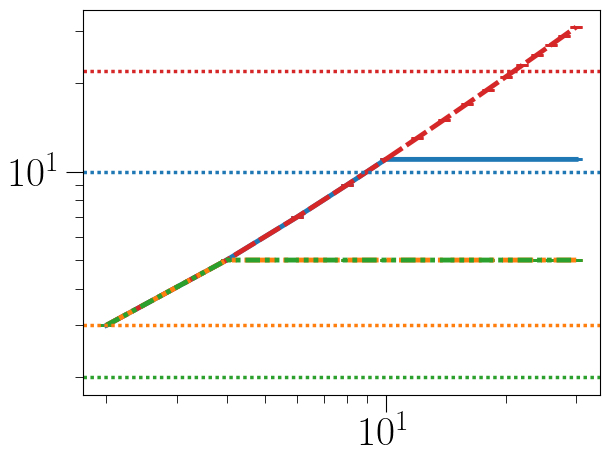

In [9]:
# fmt: off
def plot_bonds_r(ax):
    custom_errorbar(ax, range_r, read_field(data_r_g, "mean_maxbond"), read_field(data_r_g, "std_maxbond"), **STYLE_G, zorder=1)
    custom_errorbar(ax, range_r, read_field(data_r_o, "mean_maxbond"), read_field(data_r_o, "std_maxbond"), **STYLE_O, zorder=1)
    custom_errorbar(ax, range_r, read_field(data_r_a, "mean_maxbond"), read_field(data_r_a, "std_maxbond"), **STYLE_A, zorder=1)
    custom_errorbar(ax, range_r, read_field(data_r_s, "mean_maxbond"), read_field(data_r_s, "std_maxbond"), **STYLE_S, zorder=1)
    ax.axhline(y=read_field(data_r_g, "maxbond_svd")[0], **STYLE_G_SVD, zorder=2)
    ax.axhline(y=read_field(data_r_o, "maxbond_svd")[0], **STYLE_O_SVD, zorder=2)
    ax.axhline(y=read_field(data_r_a, "maxbond_svd")[0], **STYLE_A_SVD, zorder=2)
    ax.axhline(y=read_field(data_r_s, "maxbond_svd")[0], **STYLE_S_SVD, zorder=2)
    ax.set_xscale('log')
    ax.set_yscale('log')


if SHOW_FIGURES:
	fig, ax = create_subplots()
	plot_bonds_r(ax)

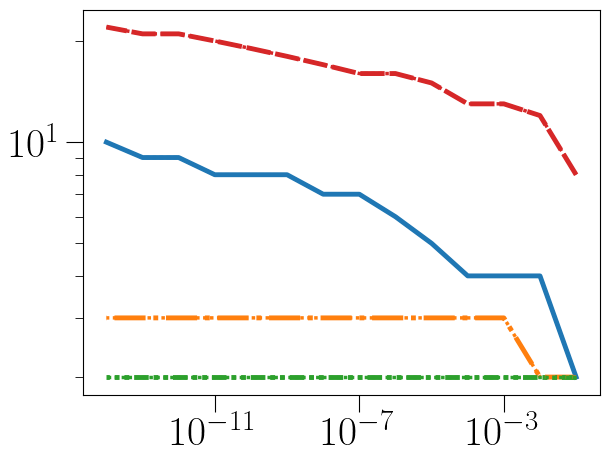

In [10]:
def plot_bonds_t(ax):
    ax.loglog(range_t, read_field(data_t_g, "maxbond_simp"), **STYLE_G)
    ax.loglog(range_t, read_field(data_t_o, "maxbond_simp"), **STYLE_O)
    ax.loglog(range_t, read_field(data_t_a, "maxbond_simp"), **STYLE_A)
    ax.loglog(range_t, read_field(data_t_s, "maxbond_simp"), **STYLE_S)
    ax.loglog(range_t, read_field(data_t_g, "maxbond_svd"), **STYLE_G_SVD)
    ax.loglog(range_t, read_field(data_t_o, "maxbond_svd"), **STYLE_O_SVD)
    ax.loglog(range_t, read_field(data_t_a, "maxbond_svd"), **STYLE_A_SVD)
    ax.loglog(range_t, read_field(data_t_s, "maxbond_svd"), **STYLE_S_SVD)


if SHOW_FIGURES:
    fig, ax = create_subplots()
    plot_bonds_t(ax)

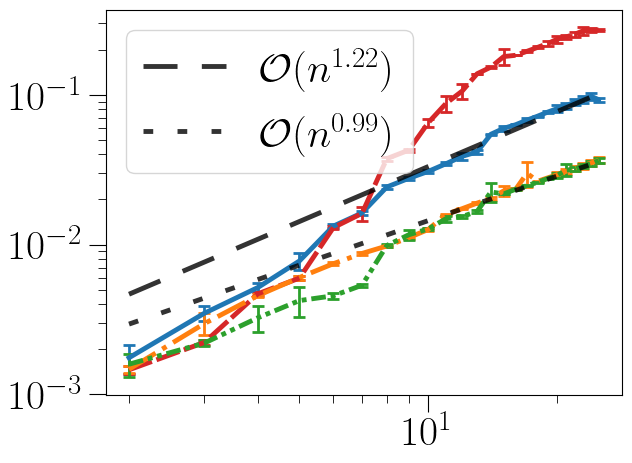

In [11]:
# fmt: off
def plot_times_n(ax):
    custom_errorbar(ax, range_n, read_field(data_n_g, "mean_time") + read_field(data_n_g, "time_simp"), read_field(data_n_g, "std_time"), **STYLE_G)
    custom_errorbar(ax, range_n, read_field(data_n_o, "mean_time") + read_field(data_n_o, "time_simp"), read_field(data_n_o, "std_time"), **STYLE_O)
    custom_errorbar(ax, range_n, read_field(data_n_a, "mean_time") + read_field(data_n_a, "time_simp"), read_field(data_n_a, "std_time"), **STYLE_A)
    custom_errorbar(ax, range_n, read_field(data_n_s, "mean_time") + read_field(data_n_s, "time_simp"), read_field(data_n_s, "std_time"), **STYLE_S)
    ax.set_xscale('log')
    ax.set_yscale('log')
    fit_power_law(ax, range_n, read_field(data_n_g, "mean_time"), fit_range=slice(10, 25), plot_range=slice(None), label='n', style=STYLE_FIT_1)
    fit_power_law(ax, range_n, read_field(data_n_a, "mean_time"), fit_range=slice(10, 25), plot_range=slice(None), label='n', style=STYLE_FIT_2)
    ax.legend()


if SHOW_FIGURES:
	fig, ax = create_subplots()
	plot_times_n(ax)

<>:9: SyntaxWarning: invalid escape sequence '\c'
<>:9: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_260688/1240101855.py:9: SyntaxWarning: invalid escape sequence '\c'
  fit_power_law(ax, range_r, read_field(data_r_o, "mean_time"), fit_range=slice(0,12), label="\chi_{\mathrm{thr}}", style=STYLE_FIT_1)


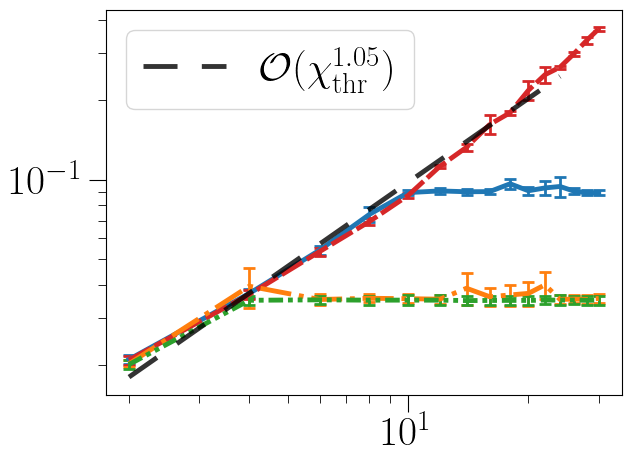

In [12]:
# fmt: off
def plot_times_r(ax):
    custom_errorbar(ax, range_r, read_field(data_r_g, "mean_time"), read_field(data_r_g, "std_time"), **STYLE_G)
    custom_errorbar(ax, range_r, read_field(data_r_o, "mean_time"), read_field(data_r_o, "std_time"), **STYLE_O)
    custom_errorbar(ax, range_r, read_field(data_r_a, "mean_time"), read_field(data_r_a, "std_time"), **STYLE_A)
    custom_errorbar(ax, range_r, read_field(data_r_s, "mean_time"), read_field(data_r_s, "std_time"), **STYLE_S)
    ax.set_xscale('log')
    ax.set_yscale('log')
    fit_power_law(ax, range_r, read_field(data_r_o, "mean_time"), fit_range=slice(0,12), label="\chi_{\mathrm{thr}}", style=STYLE_FIT_1)
    ax.legend()


if SHOW_FIGURES:
	fig, ax = create_subplots()
	plot_times_r(ax)

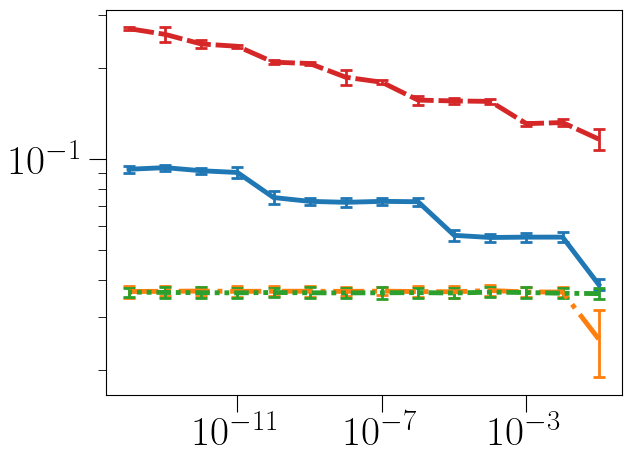

In [13]:
# fmt: off
def plot_times_t(ax):
    custom_errorbar(ax, range_t, read_field(data_t_g, "mean_time") + read_field(data_t_g, "time_simp"), read_field(data_t_g, "std_time"), **STYLE_G)
    custom_errorbar(ax, range_t, read_field(data_t_o, "mean_time") + read_field(data_t_o, "time_simp"), read_field(data_t_o, "std_time"), **STYLE_O)
    custom_errorbar(ax, range_t, read_field(data_t_a, "mean_time") + read_field(data_t_a, "time_simp"), read_field(data_t_a, "std_time"), **STYLE_A)
    custom_errorbar(ax, range_t, read_field(data_t_s, "mean_time") + read_field(data_t_s, "time_simp"), read_field(data_t_s, "std_time"), **STYLE_S)
    ax.set_xscale('log')
    ax.set_yscale('log')
    
	
if SHOW_FIGURES:
	fig, ax = create_subplots()
	plot_times_t(ax)

### Subplots

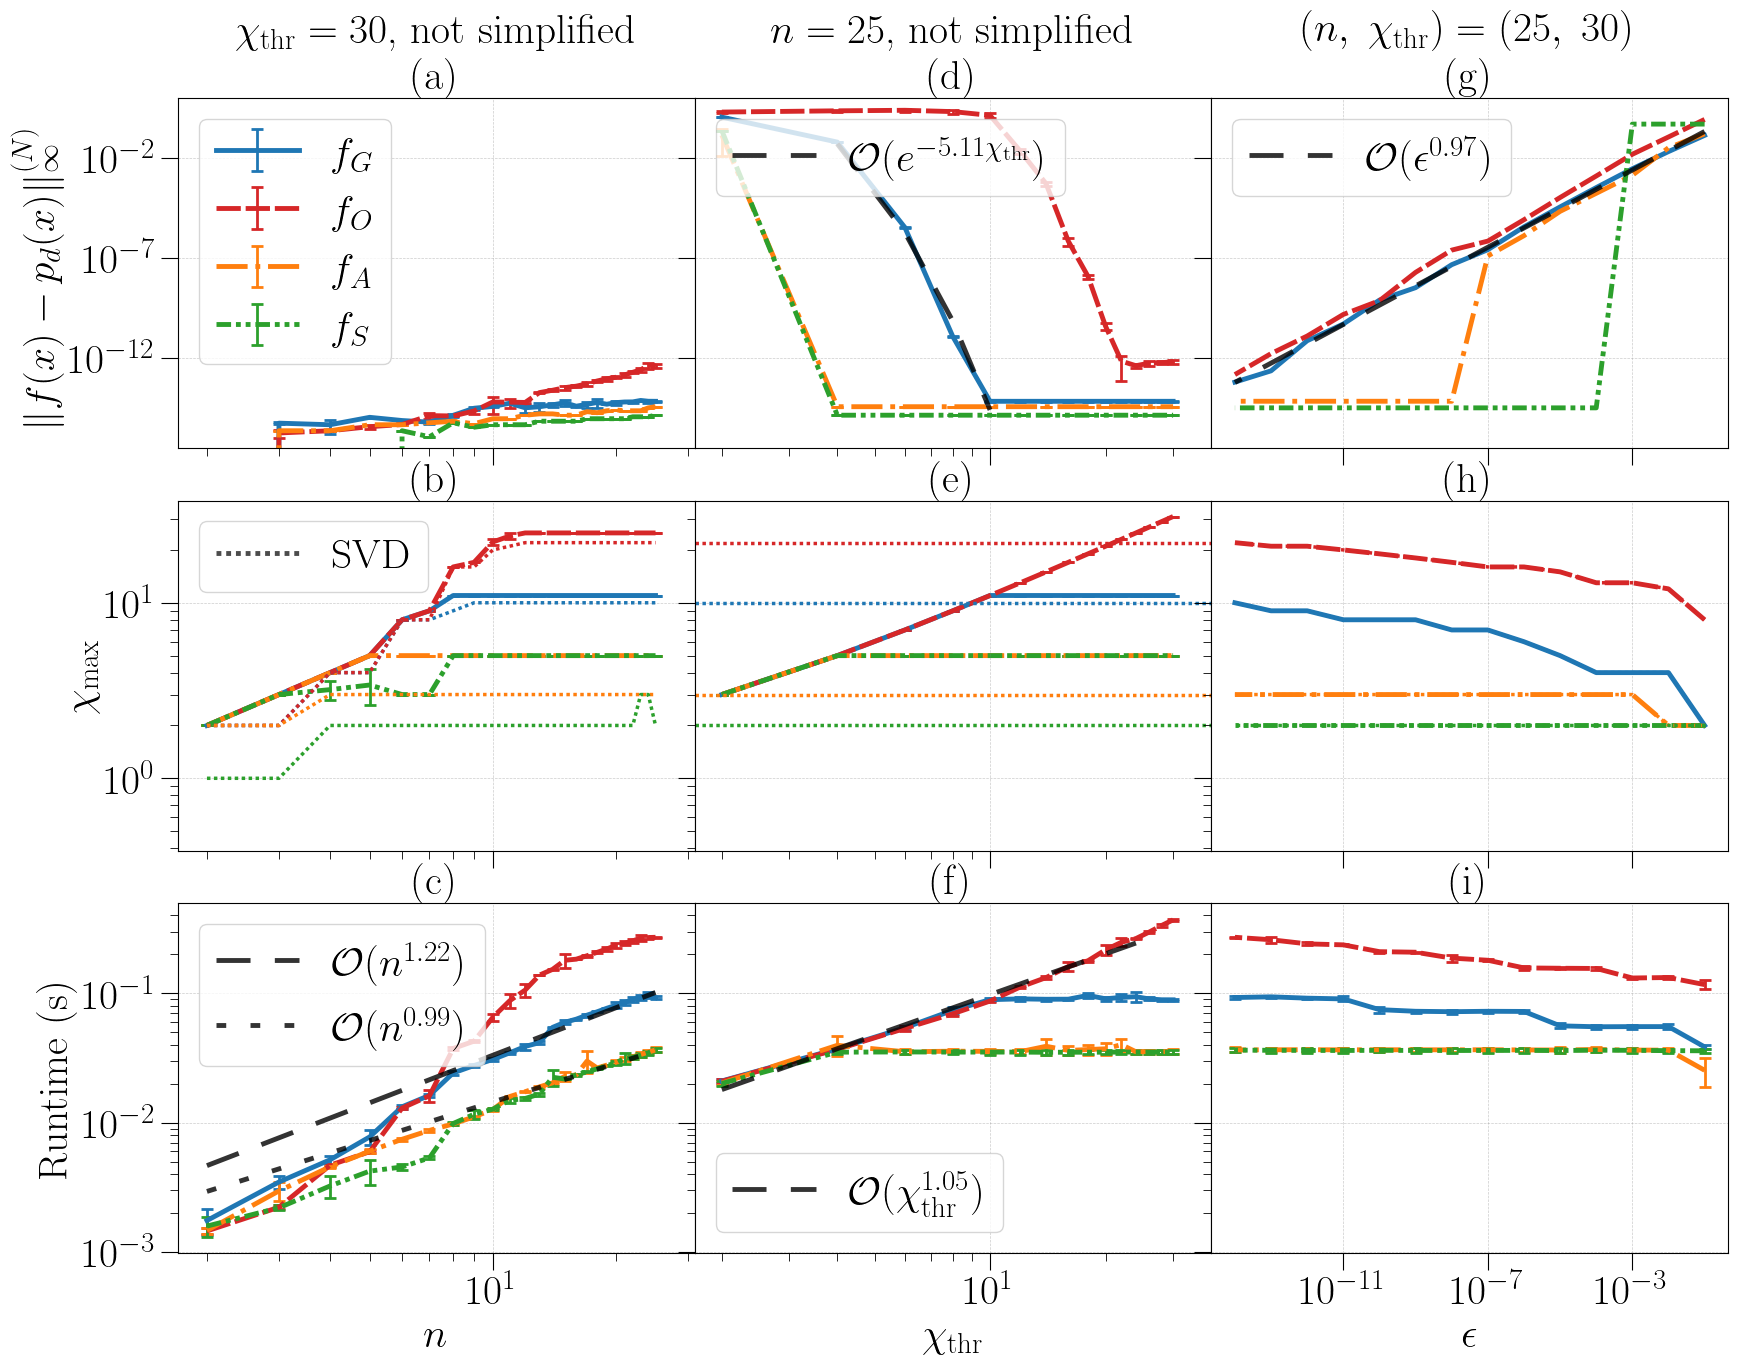

In [14]:
# fmt: off
from matplotlib import ticker
fig, axs = create_subplots(3, 3, sharex='col', sharey='row')

plot_norms_n(axs[0, 0])
plot_norms_r(axs[0, 1])
plot_norms_t(axs[0, 2])
plot_bonds_n(axs[1, 0])
plot_bonds_r(axs[1, 1])
plot_bonds_t(axs[1, 2])
plot_times_n(axs[2, 0])
plot_times_r(axs[2, 1])
plot_times_t(axs[2, 2])

column_labels = [r"$n$", r"$\chi_{\mathrm{thr}}$", r"$\epsilon$"]
for ax, col in zip(axs[2], column_labels):
    ax.set_xlabel(col)

row_labels = [
    r"$\Vert f(x) - p_d(x)\Vert_\infty^{(N)}$",
    r"$\chi_{\mathrm{max}}$",
    "Runtime (s)",
]
for ax, row in zip(axs[:, 0], row_labels):
    ax.set_ylabel(row)

for i, ax in enumerate(axs.flat):
    rows, cols = axs.shape 
    col_wise_index = np.ravel_multi_index(np.unravel_index(i, (rows, cols), order='F'), (cols, rows))
    ax.set_title(f"(" + chr(ord("a") + col_wise_index) + ")")
    ax.grid(which="major")
    ax.xaxis.set_minor_locator(ticker.LogLocator(numticks=999, subs="auto"))
    ax.yaxis.set_minor_locator(ticker.LogLocator(numticks=999, subs="auto"))

axs[0, 0].set_title(r"$\chi_{\mathrm{thr}}=30$, not simplified"  + "\n (a)")
axs[0, 1].set_title(r"$n=25$, not simplified" + "\n (d)")
axs[0, 2].set_title(r"$(n, \ \chi_{\mathrm{thr}}) = (25, \ 30)$" + "\n (g)")

# Set first row y-limits
for ax_row in axs[0, :]:
    ax_row.set_ylim(3e-17, 1e1)

# Fix broken xlim for n and chi
for ax in axs[:, 0]:
    ax.set_xlim(1.7)
for ax in axs[:, 1]:
    ax.set_xlim(1.7)
    
fig.subplots_adjust(hspace=0.15, wspace=0.0)
plt.savefig("figures/cross_1d.pdf", dpi=300, bbox_inches="tight")